# Australian Apparel Sales Analysis - Q4 2020

## Executive Summary
This report analyzes the sales data of the company for the fourth quarter (October-December 2020) in Australia, examining it on a state-by-state basis. The analysis provides insights to assist the company in making data-driven decisions for the upcoming year.

### Objectives:
1. Data Wrangling - Clean and prepare data
2. Data Analysis - Statistical analysis and insights
3. Data Visualization - Create comprehensive dashboard
4. Report Generation - Document findings and recommendations

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


---,# 1. DATA WRANGLING,,## 1.1 Load and Inspect Data

In [14]:
# Load the dataset
df = pd.read_csv('AusApparalSales4thQrt2020.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 10 rows:")
df.head(10)

Dataset Shape: (7560, 6)

First 10 rows:


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
5,1-Oct-2020,Afternoon,WA,Men,10,25000
6,1-Oct-2020,Afternoon,WA,Women,3,7500
7,1-Oct-2020,Afternoon,WA,Seniors,11,27500
8,1-Oct-2020,Evening,WA,Kids,15,37500
9,1-Oct-2020,Evening,WA,Men,15,37500


In [15]:
# Display basic information
print("Dataset Information:")
df.info()
print("\n" + "="*80)
print("\nColumn Names:")
print(df.columns.tolist())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


Column Names:
['Date', 'Time', 'State', 'Group', 'Unit', 'Sales']


### 1.2 Data Quality Check - Missing and Incorrect Values

In [16]:
# Check for missing values using isna()
print("Missing Values Analysis:")
print("="*80)
missing_values = df.isna().sum()
missing_percentage = (df.isna().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
})

print(missing_df)
print("\n" + "="*80)

# Check for non-null values using notna()
print("\nNon-Null Values Count:")
print(df.notna().sum())

Missing Values Analysis:
  Column  Missing Count  Missing Percentage
0   Date              0                 0.0
1   Time              0                 0.0
2  State              0                 0.0
3  Group              0                 0.0
4   Unit              0                 0.0
5  Sales              0                 0.0


Non-Null Values Count:
Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64


In [7]:
# Check for duplicate rows
print("Duplicate Rows Analysis:")
print("="*80)
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))

Duplicate Rows Analysis:
Number of duplicate rows: 0


In [8]:
# Check for negative or zero values in numerical columns
print("Data Validity Check:")
print("="*80)
print(f"Negative values in 'Unit': {(df['Unit'] < 0).sum()}")
print(f"Zero values in 'Unit': {(df['Unit'] == 0).sum()}")
print(f"Negative values in 'Sales': {(df['Sales'] < 0).sum()}")
print(f"Zero values in 'Sales': {(df['Sales'] == 0).sum()}")

print("\nUnique values in categorical columns:")
print(f"States: {df['State'].unique()}")
print(f"Groups: {df['Group'].unique()}")
print(f"Time: {df['Time'].unique()}")

Data Validity Check:
Negative values in 'Unit': 0
Zero values in 'Unit': 0
Negative values in 'Sales': 0
Zero values in 'Sales': 0

Unique values in categorical columns:
States: [' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
Groups: [' Kids' ' Men' ' Women' ' Seniors']
Time: [' Morning' ' Afternoon' ' Evening']


### 1.3 Recommendations for Handling Missing/Incorrect Data

**Analysis and Recommendations:**

1. **Missing Values Treatment:**   
   - If missing values exist in numerical columns (Unit, Sales): Use median imputation for robust handling of outliers
   - If missing values exist in categorical columns (State, Group, Time): Use mode imputation or drop if < 5% of data
   - For Date/Time missing values: Drop rows as temporal data is critical for trend analysis

2. **Incorrect/Invalid Data Treatment:**   
   - Remove rows with negative values in Unit or Sales (business rule violation)
   - For zero values: Investigate if they represent valid transactions or data entry errors
   - Standardize text fields (remove leading/trailing spaces in State, Group, Time)

3. **Duplicate Handling:**   
   - Remove exact duplicates
   - Investigate near-duplicates for potential aggregation

In [ ]:
# Clean the data based on findings
df_clean = df.copy()

# Strip whitespaces from string columns
string_columns = ['Date', 'Time', 'State', 'Group']
for col in string_columns:
    df_clean[col] = df_clean[col].str.strip()

# Remove duplicates if any
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
print(f"Removed {initial_rows - len(df_clean)} duplicate rows")


Removed 0 duplicate rows

Cleaned dataset shape: (7560, 6)
Missing values after cleaning: 0


### 1.4 Data Transformation and Feature Engineering

In [19]:
# Convert Date column to datetime format
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%d-%b-%Y')

# Extract additional time features
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.month
df_clean['Month_Name'] = df_clean['Date'].dt.strftime('%B')
df_clean['Week'] = df_clean['Date'].dt.isocalendar().week
df_clean['Day'] = df_clean['Date'].dt.day
df_clean['DayOfWeek'] = df_clean['Date'].dt.day_name()
df_clean['Quarter'] = df_clean['Date'].dt.quarter

print("Date parsing completed!")
print("\nNew columns added:")
print(df_clean[['Date', 'Month_Name', 'Week', 'DayOfWeek', 'Quarter']].head())

Date parsing completed!

New columns added:
        Date Month_Name  Week DayOfWeek  Quarter
0 2020-10-01    October    40  Thursday        4
1 2020-10-01    October    40  Thursday        4
2 2020-10-01    October    40  Thursday        4
3 2020-10-01    October    40  Thursday        4
4 2020-10-01    October    40  Thursday        4


## 1.5 Data Normalization

**Why Normalization?**
- Normalization scales data to a fixed range (0-1), which is preferred for this analysis
- It preserves the shape of the distribution and handles outliers better than standardization
- Useful for comparing sales across different states and groups on the same scale

**Method:** Min-Max Normalization using the formula: `(X - X_min) / (X_max - X_min)`

In [20]:
# Apply Min-Max Normalization
scaler = MinMaxScaler()

# Normalize Unit and Sales columns
df_clean['Unit_Normalized'] = scaler.fit_transform(df_clean[['Unit']])
df_clean['Sales_Normalized'] = scaler.fit_transform(df_clean[['Sales']])

print("Normalization completed!")
print("\nComparison of original vs normalized values:")
comparison_df = df_clean[['Unit', 'Unit_Normalized', 'Sales', 'Sales_Normalized']].describe()
print(comparison_df)

Normalization completed!

Comparison of original vs normalized values:
              Unit  Unit_Normalized          Sales  Sales_Normalized
count  7560.000000      7560.000000    7560.000000       7560.000000
mean     18.005423         0.254054   45013.558201          0.254054
std      12.901403         0.204784   32253.506944          0.204784
min       2.000000         0.000000    5000.000000          0.000000
25%       8.000000         0.095238   20000.000000          0.095238
50%      14.000000         0.190476   35000.000000          0.190476
75%      26.000000         0.380952   65000.000000          0.380952
max      65.000000         1.000000  162500.000000          1.000000


## 1.6 GroupBy Function Analysis and Recommendations

**Application of GroupBy():**

The `GroupBy()` function is essential for:
1. **Data Chunking:** Splitting data into meaningful segments (State, Group, Time)
2. **Data Aggregation:** Computing summary statistics for each segment
3. **Comparative Analysis:** Comparing performance across different dimensions

**Recommendation:**
- Use GroupBy for aggregating sales data by State, Group, and Time period
- Create multi-level groupings for comprehensive analysis
- Apply aggregate functions (sum, mean, count) to derive insights

In [21]:
# Demonstrate GroupBy applications

# 1. Group by State
print("State-wise Sales Summary:")
print("="*80)
state_summary = df_clean.groupby('State').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit': ['sum', 'mean']
}).round(2)
print(state_summary)

print("\n" + "="*80)

# 2. Group by Demographic Group
print("\nGroup-wise Sales Summary:")
print("="*80)
group_summary = df_clean.groupby('Group').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit': ['sum', 'mean']
}).round(2)
print(group_summary)

print("\n" + "="*80)

# 3. Group by Time of Day
print("\nTime-of-Day Sales Summary:")
print("="*80)
time_summary = df_clean.groupby('Time').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit': ['sum', 'mean']
}).round(2)
print(time_summary)

State-wise Sales Summary:
           Sales                   Unit       
             sum      mean count    sum   mean
State                                         
NSW     74970000  69416.67  1080  29988  27.77
NT      22580000  20907.41  1080   9032   8.36
QLD     33417500  30942.13  1080  13367  12.38
SA      58857500  54497.69  1080  23543  21.80
TAS     22760000  21074.07  1080   9104   8.43
VIC    105565000  97745.37  1080  42226  39.10
WA      22152500  20511.57  1080   8861   8.20


Group-wise Sales Summary:
            Sales                   Unit       
              sum      mean count    sum   mean
Group                                          
Kids     85072500  45011.90  1890  34029  18.00
Men      85750000  45370.37  1890  34300  18.15
Seniors  84037500  44464.29  1890  33615  17.79
Women    85442500  45207.67  1890  34177  18.08


Time-of-Day Sales Summary:
               Sales                   Unit       
                 sum      mean count    sum   mean
Time     

In [ ]:
# Multi-level grouping for deeper insights
print("Multi-dimensional Analysis (State x Group):")
print("="*80)
state_group_summary = df_clean.groupby(['State', 'Group'])['Sales'].agg(['sum', 'mean', 'count']).round(2)
print(state_group_summary.head(20))

print("\n" + "="*80)
print("\nMulti-dimensional Analysis (State x Time):")
print("="*80)
state_time_summary = df_clean.groupby(['State', 'Time'])['Sales'].sum().unstack(fill_value=0)
print(state_time_summary)

## 2. DATA ANALYSIS

### 2.1 Descriptive Statistical Analysis

In [ ]:
# Comprehensive statistical analysis for Sales and Unit columns
print("Descriptive Statistics for Sales:")
print("="*80)

sales_stats = {
    'Mean': df_clean['Sales'].mean(),
    'Median': df_clean['Sales'].median(),
    'Mode': df_clean['Sales'].mode()[0] if len(df_clean['Sales'].mode()) > 0 else 'N/A',
    'Standard Deviation': df_clean['Sales'].std(),
    'Variance': df_clean['Sales'].var(),
    'Min': df_clean['Sales'].min(),
    'Max': df_clean['Sales'].max(),
    'Range': df_clean['Sales'].max() - df_clean['Sales'].min(),
    'Q1 (25th percentile)': df_clean['Sales'].quantile(0.25),
    'Q3 (75th percentile)': df_clean['Sales'].quantile(0.75),
    'IQR': df_clean['Sales'].quantile(0.75) - df_clean['Sales'].quantile(0.25),
    'Skewness': df_clean['Sales'].skew(),
    'Kurtosis': df_clean['Sales'].kurtosis()
}

sales_stats_df = pd.DataFrame(list(sales_stats.items()), columns=['Statistic', 'Value'])
print(sales_stats_df.to_string(index=False))

print("\n" + "="*80)
print("\nDescriptive Statistics for Units:")
print("="*80)

unit_stats = {
    'Mean': df_clean['Unit'].mean(),
    'Median': df_clean['Unit'].median(),
    'Mode': df_clean['Unit'].mode()[0] if len(df_clean['Unit'].mode()) > 0 else 'N/A',
    'Standard Deviation': df_clean['Unit'].std(),
    'Variance': df_clean['Unit'].var(),
    'Min': df_clean['Unit'].min(),
    'Max': df_clean['Unit'].max(),
    'Range': df_clean['Unit'].max() - df_clean['Unit'].min(),
    'Q1 (25th percentile)': df_clean['Unit'].quantile(0.25),
    'Q3 (75th percentile)': df_clean['Unit'].quantile(0.75),
    'IQR': df_clean['Unit'].quantile(0.75) - df_clean['Unit'].quantile(0.25),
    'Skewness': df_clean['Unit'].skew(),
    'Kurtosis': df_clean['Unit'].kurtosis()
}

unit_stats_df = pd.DataFrame(list(unit_stats.items()), columns=['Statistic', 'Value'])
print(unit_stats_df.to_string(index=False))

### Box Plot for Descriptive Statistics

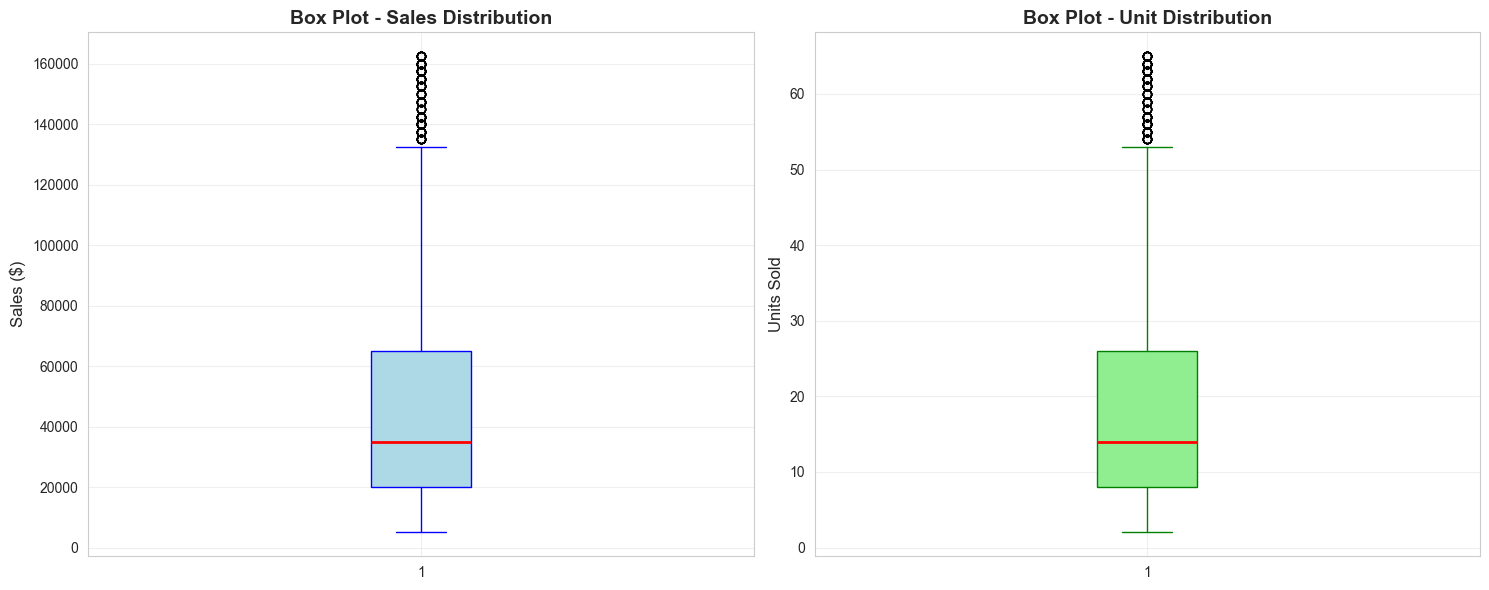


Box Plot Interpretation:
- The box represents the interquartile range (IQR) containing 50% of the data
- The red line inside the box is the median
- Whiskers extend to 1.5 * IQR
- Points beyond whiskers are potential outliers


In [ ]:
# Create box plots for Sales and Unit
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot for Sales
axes[0].boxplot(df_clean['Sales'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                whiskerprops=dict(color='blue'),
                capprops=dict(color='blue'),
                medianprops=dict(color='red', linewidth=2))
axes[0].set_title('Box Plot - Sales Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Sales ($)', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Box plot for Unit
axes[1].boxplot(df_clean['Unit'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', color='green'),
                whiskerprops=dict(color='green'),
                capprops=dict(color='green'),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_title('Box Plot - Unit Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Units Sold', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nBox Plot Interpretation:")
print("- The box represents the interquartile range (IQR) containing 50% of the data")
print("- The red line inside the box is the median")
print("- Whiskers extend to 1.5 * IQR")
print("- Points beyond whiskers are potential outliers")

## 2.2 Group Performance Analysis

In [23]:
# Identify highest and lowest performing groups
print("Performance Analysis by Demographic Group:")
print("="*80)

group_performance = df_clean.groupby('Group').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit': ['sum', 'mean']
}).round(2)

group_performance.columns = ['Total Sales', 'Avg Sales', 'Transaction Count', 'Total Units', 'Avg Units']
group_performance = group_performance.sort_values('Total Sales', ascending=False)

print(group_performance)

print("\n" + "="*80)
print("\n**KEY FINDINGS:**")
print(f"✓ Highest Sales Group: {group_performance.index[0]} with ${group_performance['Total Sales'].iloc[0]:,.2f}")
print(f"✓ Lowest Sales Group: {group_performance.index[-1]} with ${group_performance['Total Sales'].iloc[-1]:,.2f}")
print(f"✓ Most Active Group (by transactions): {group_performance.sort_values('Transaction Count', ascending=False).index[0]}")
print(f"✓ Highest Average Transaction: {group_performance.sort_values('Avg Sales', ascending=False).index[0]}")

Performance Analysis by Demographic Group:
         Total Sales  Avg Sales  Transaction Count  Total Units  Avg Units
Group                                                                     
Men         85750000   45370.37               1890        34300      18.15
Women       85442500   45207.67               1890        34177      18.08
Kids        85072500   45011.90               1890        34029      18.00
Seniors     84037500   44464.29               1890        33615      17.79


**KEY FINDINGS:**
✓ Highest Sales Group: Men with $85,750,000.00
✓ Lowest Sales Group: Seniors with $84,037,500.00
✓ Most Active Group (by transactions): Men
✓ Highest Average Transaction: Men


In [24]:
# State-wise performance analysis
print("Performance Analysis by State:")
print("="*80)

state_performance = df_clean.groupby('State').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit': ['sum', 'mean']
}).round(2)

state_performance.columns = ['Total Sales', 'Avg Sales', 'Transaction Count', 'Total Units', 'Avg Units']
state_performance = state_performance.sort_values('Total Sales', ascending=False)

print(state_performance)

print("\n" + "="*80)
print("\n**KEY FINDINGS:**")
print(f"✓ Highest Sales State: {state_performance.index[0]} with ${state_performance['Total Sales'].iloc[0]:,.2f}")
print(f"✓ Lowest Sales State: {state_performance.index[-1]} with ${state_performance['Total Sales'].iloc[-1]:,.2f}")
print(f"✓ Most Active State (by transactions): {state_performance.sort_values('Transaction Count', ascending=False).index[0]}")

Performance Analysis by State:
       Total Sales  Avg Sales  Transaction Count  Total Units  Avg Units
State                                                                   
VIC      105565000   97745.37               1080        42226      39.10
NSW       74970000   69416.67               1080        29988      27.77
SA        58857500   54497.69               1080        23543      21.80
QLD       33417500   30942.13               1080        13367      12.38
TAS       22760000   21074.07               1080         9104       8.43
NT        22580000   20907.41               1080         9032       8.36
WA        22152500   20511.57               1080         8861       8.20


**KEY FINDINGS:**
✓ Highest Sales State: VIC with $105,565,000.00
✓ Lowest Sales State: WA with $22,152,500.00
✓ Most Active State (by transactions): VIC


## 2.3 Time-based Reports (Daily, Weekly, Monthly, Quarterly)

In [ ]:
# Daily Report
print("DAILY SALES REPORT:")
print("="*80)
daily_report = df_clean.groupby('Date').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit': 'sum'
}).round(2)
daily_report.columns = ['Total Sales', 'Avg Sales', 'Transactions', 'Total Units']
print(daily_report.head(15))
print(f"\nTotal days in dataset: {len(daily_report)}")

In [ ]:
# Weekly Report
print("WEEKLY SALES REPORT:")
print("="*80)
weekly_report = df_clean.groupby(['Year', 'Week']).agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit': 'sum'
}).round(2)
weekly_report.columns = ['Total Sales', 'Avg Sales', 'Transactions', 'Total Units']
print(weekly_report)

print("\n" + "="*80)
print(f"\n**Best Performing Week:** Week {weekly_report['Total Sales'].idxmax()[1]} with ${weekly_report['Total Sales'].max():,.2f}")
print(f"**Weakest Week:** Week {weekly_report['Total Sales'].idxmin()[1]} with ${weekly_report['Total Sales'].min():,.2f}")

In [ ]:
# Monthly Report
print("MONTHLY SALES REPORT:")
print("="*80)
monthly_report = df_clean.groupby('Month_Name').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit': 'sum'
}).round(2)
monthly_report.columns = ['Total Sales', 'Avg Sales', 'Transactions', 'Total Units']

# Reorder by month
month_order = ['October', 'November', 'December']
monthly_report = monthly_report.reindex([m for m in month_order if m in monthly_report.index])
print(monthly_report)

print("\n" + "="*80)
print(f"\n**Best Performing Month:** {monthly_report['Total Sales'].idxmax()} with ${monthly_report['Total Sales'].max():,.2f}")
print(f"**Growth/Decline Trend:** ", end="")
if len(monthly_report) >= 2:
    pct_change = ((monthly_report['Total Sales'].iloc[-1] - monthly_report['Total Sales'].iloc[0]) / monthly_report['Total Sales'].iloc[0]) * 100
    print(f"{pct_change:+.2f}% from {monthly_report.index[0]} to {monthly_report.index[-1]}")

In [ ]:
# Quarterly Report (Q4 2020)
print("QUARTERLY SALES REPORT (Q4 2020):")
print("="*80)
quarterly_report = df_clean.groupby('Quarter').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit': 'sum'
}).round(2)
quarterly_report.columns = ['Total Sales', 'Avg Sales', 'Transactions', 'Total Units']
print(quarterly_report)

print("\n" + "="*80)
print("\n**Q4 2020 Summary:**")
print(f"✓ Total Revenue: ${quarterly_report['Total Sales'].sum():,.2f}")
print(f"✓ Total Units Sold: {quarterly_report['Total Units'].sum():,.0f}")
print(f"✓ Total Transactions: {quarterly_report['Transactions'].sum():,.0f}")
print(f"✓ Average Transaction Value: ${quarterly_report['Total Sales'].sum() / quarterly_report['Transactions'].sum():,.2f}")

---
# 3. DATA VISUALIZATION

## Visualization Package Recommendation

**Selected Package: Seaborn + Matplotlib**

**Justification:**
1. **Seaborn:** Built on top of Matplotlib, provides high-level interface for statistical graphics
2. **Integration:** Seamless integration with pandas DataFrames
3. **Aesthetics:** Professional, publication-ready visualizations with minimal code
4. **Statistical Focus:** Ideal for distributions, correlations, and categorical analysis
5. **Flexibility:** Can be customized using Matplotlib for fine-tuning

## 3.1 State-wise Sales Analysis Dashboard

In [ ]:
# State-wise sales by demographic group
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('State-wise Sales Analysis by Demographic Group', fontsize=16, fontweight='bold', y=1.00)

# Pivot data for visualization
state_group_pivot = df_clean.pivot_table(values='Sales', index='State', columns='Group', aggfunc='sum')

# 1. Grouped Bar Chart
state_group_pivot.plot(kind='bar', ax=axes[0, 0], rot=45, width=0.8)
axes[0, 0].set_title('Total Sales by State and Group', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('State', fontsize=11)
axes[0, 0].set_ylabel('Total Sales ($)', fontsize=11)
axes[0, 0].legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Stacked Bar Chart
state_group_pivot.plot(kind='bar', stacked=True, ax=axes[0, 1], rot=45, width=0.8)
axes[0, 1].set_title('Stacked Sales Distribution by State', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('State', fontsize=11)
axes[0, 1].set_ylabel('Total Sales ($)', fontsize=11)
axes[0, 1].legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Heatmap
sns.heatmap(state_group_pivot, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[1, 0], cbar_kws={'label': 'Sales ($)'})
axes[1, 0].set_title('Sales Heatmap: State x Group', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Demographic Group', fontsize=11)
axes[1, 0].set_ylabel('State', fontsize=11)

# 4. Percentage contribution
state_group_pct = state_group_pivot.div(state_group_pivot.sum(axis=1), axis=0) * 100
state_group_pct.plot(kind='bar', stacked=True, ax=axes[1, 1], rot=45, width=0.8)
axes[1, 1].set_title('Percentage Contribution by Group (State-wise)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('State', fontsize=11)
axes[1, 1].set_ylabel('Percentage (%)', fontsize=11)
axes[1, 1].legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 3.2 Group-wise Sales Analysis Across States

In [ ]:
# Group-wise analysis
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Group-wise Sales Analysis Across States', fontsize=16, fontweight='bold', y=1.00)

# Pivot data
group_state_pivot = df_clean.pivot_table(values='Sales', index='Group', columns='State', aggfunc='sum')

# 1. Grouped Bar Chart
group_state_pivot.plot(kind='bar', ax=axes[0, 0], rot=0, width=0.8)
axes[0, 0].set_title('Total Sales by Group Across States', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Demographic Group', fontsize=11)
axes[0, 0].set_ylabel('Total Sales ($)', fontsize=11)
axes[0, 0].legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2-4. Pie charts for each group (or as many as fit)
groups = sorted(df_clean['Group'].unique())
colors_pie = sns.color_palette('Set3', len(df_clean['State'].unique()))

for idx in range(min(3, len(groups))):
    row = (idx + 1) // 2
    col = (idx + 1) % 2
    
    group_data = df_clean[df_clean['Group'] == groups[idx]].groupby('State')['Sales'].sum()
    axes[row, col].pie(group_data.values, labels=group_data.index, autopct='%1.1f%%',
                       startangle=90, colors=colors_pie)
    axes[row, col].set_title(f'{groups[idx]} Sales Distribution by State', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 3.3 Time-of-Day Analysis (Peak and Off-Peak)

In [ ]:
# Time-of-day analysis
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Time-of-Day Sales Analysis', fontsize=16, fontweight='bold', y=1.00)

# 1. Overall time-of-day sales
time_sales = df_clean.groupby('Time')['Sales'].sum().sort_values(ascending=False)
colors_time = ['#2ecc71' if val == time_sales.max() else '#e74c3c' if val == time_sales.min() else '#3498db' for val in time_sales.values]

time_sales.plot(kind='bar', ax=axes[0, 0], color=colors_time, width=0.7)
axes[0, 0].set_title('Total Sales by Time of Day', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Time of Day', fontsize=11)
axes[0, 0].set_ylabel('Total Sales ($)', fontsize=11)
axes[0, 0].set_xticklabels(time_sales.index, rotation=0)
axes[0, 0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(time_sales.values):
    axes[0, 0].text(i, v + time_sales.max() * 0.02, f'${v:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 2. Time-of-day by group
time_group_pivot = df_clean.pivot_table(values='Sales', index='Time', columns='Group', aggfunc='sum')
time_group_pivot.plot(kind='bar', ax=axes[0, 1], rot=0, width=0.8)
axes[0, 1].set_title('Sales by Time of Day and Group', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Time of Day', fontsize=11)
axes[0, 1].set_ylabel('Total Sales ($)', fontsize=11)
axes[0, 1].legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Average transaction value by time
time_avg = df_clean.groupby('Time')['Sales'].mean().sort_values(ascending=False)
time_avg.plot(kind='barh', ax=axes[1, 0], color='coral', width=0.7)
axes[1, 0].set_title('Average Transaction Value by Time', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Average Sales ($)', fontsize=11)
axes[1, 0].set_ylabel('Time of Day', fontsize=11)
axes[1, 0].grid(axis='x', alpha=0.3)

# 4. Transaction count by time
time_count = df_clean.groupby('Time').size().sort_values(ascending=False)
time_count.plot(kind='bar', ax=axes[1, 1], color='skyblue', width=0.7)
axes[1, 1].set_title('Transaction Volume by Time of Day', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Time of Day', fontsize=11)
axes[1, 1].set_ylabel('Number of Transactions', fontsize=11)
axes[1, 1].set_xticklabels(time_count.index, rotation=0)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Peak and Off-peak identification
print("\n" + "="*80)
print("PEAK AND OFF-PEAK ANALYSIS:")
print("="*80)
print(f"\n✓ PEAK PERIOD: {time_sales.idxmax()} with ${time_sales.max():,.0f} in total sales")
print(f"✓ OFF-PEAK PERIOD: {time_sales.idxmin()} with ${time_sales.min():,.0f} in total sales")
print(f"\n✓ Peak vs Off-peak difference: ${time_sales.max() - time_sales.min():,.0f}")
print(f"✓ Peak is {(time_sales.max() / time_sales.min() - 1) * 100:.1f}% higher than off-peak")

print("\n**STRATEGIC RECOMMENDATIONS:**")
print("1. Deploy more staff during peak hours for better customer service")
print("2. Offer targeted promotions during off-peak hours to boost sales")
print("3. Implement dynamic pricing strategies based on demand patterns")
print("4. Schedule inventory replenishment before peak periods")

## 3.4 Daily Sales Trends

In [ ]:
# Daily trends
fig, axes = plt.subplots(2, 1, figsize=(16, 10))
fig.suptitle('Daily Sales Trends - Q4 2020', fontsize=16, fontweight='bold')

# 1. Line chart - daily sales
daily_sales = df_clean.groupby('Date')['Sales'].sum()
axes[0].plot(daily_sales.index, daily_sales.values, marker='o', linewidth=2, markersize=4, color='#3498db')
axes[0].fill_between(daily_sales.index, daily_sales.values, alpha=0.3, color='#3498db')
axes[0].set_title('Daily Total Sales', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=11)
axes[0].set_ylabel('Total Sales ($)', fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Add trend line
z = np.polyfit(range(len(daily_sales)), daily_sales.values, 1)
p = np.poly1d(z)
axes[0].plot(daily_sales.index, p(range(len(daily_sales))), "r--", linewidth=2, label=f'Trend (slope={z[0]:.2f})')
axes[0].legend()

# 2. Bar chart - daily units sold
daily_units = df_clean.groupby('Date')['Unit'].sum()
axes[1].bar(daily_units.index, daily_units.values, color='#2ecc71', alpha=0.7, width=0.8)
axes[1].set_title('Daily Units Sold', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=11)
axes[1].set_ylabel('Total Units', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3.5 Weekly Sales Trends

In [ ]:
# Weekly trends
fig, axes = plt.subplots(2, 1, figsize=(16, 10))
fig.suptitle('Weekly Sales Trends - Q4 2020', fontsize=16, fontweight='bold')

# Prepare weekly data
weekly_sales = df_clean.groupby('Week')['Sales'].sum().sort_index()
weekly_units = df_clean.groupby('Week')['Unit'].sum().sort_index()

# 1. Line + Bar chart for weekly sales
ax1 = axes[0]
ax2 = ax1.twinx()

ax1.bar(weekly_sales.index, weekly_sales.values, color='#3498db', alpha=0.6, label='Total Sales', width=0.6)
ax2.plot(weekly_sales.index, weekly_sales.values, marker='o', color='#e74c3c', linewidth=2, markersize=8, label='Sales Trend')

ax1.set_xlabel('Week Number', fontsize=11)
ax1.set_ylabel('Total Sales ($)', fontsize=11, color='#3498db')
ax2.set_ylabel('Sales Trend ($)', fontsize=11, color='#e74c3c')
ax1.set_title('Weekly Sales Performance', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 2. Stacked area chart for weekly sales by group
weekly_group = df_clean.groupby(['Week', 'Group'])['Sales'].sum().unstack(fill_value=0)
weekly_group.plot(kind='area', stacked=True, ax=axes[1], alpha=0.7)
axes[1].set_title('Weekly Sales by Demographic Group', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Week Number', fontsize=11)
axes[1].set_ylabel('Total Sales ($)', fontsize=11)
axes[1].legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 3.6 Monthly Sales Trends

In [ ]:
# Monthly trends
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Monthly Sales Analysis - Q4 2020', fontsize=16, fontweight='bold', y=1.00)

# Prepare monthly data
monthly_sales = df_clean.groupby('Month_Name')['Sales'].sum()
month_order = ['October', 'November', 'December']
monthly_sales = monthly_sales.reindex([m for m in month_order if m in monthly_sales.index])

# 1. Bar chart - monthly sales
colors_month = ['#e74c3c', '#f39c12', '#2ecc71']
monthly_sales.plot(kind='bar', ax=axes[0, 0], color=colors_month[:len(monthly_sales)], width=0.6)
axes[0, 0].set_title('Monthly Total Sales', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Month', fontsize=11)
axes[0, 0].set_ylabel('Total Sales ($)', fontsize=11)
axes[0, 0].set_xticklabels(monthly_sales.index, rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(monthly_sales.values):
    axes[0, 0].text(i, v + monthly_sales.max() * 0.02, f'${v:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 2. Grouped bar - monthly sales by group
monthly_group = df_clean.groupby(['Month_Name', 'Group'])['Sales'].sum().unstack(fill_value=0)
monthly_group = monthly_group.reindex([m for m in month_order if m in monthly_group.index])
monthly_group.plot(kind='bar', ax=axes[0, 1], rot=45, width=0.8)
axes[0, 1].set_title('Monthly Sales by Demographic Group', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Month', fontsize=11)
axes[0, 1].set_ylabel('Total Sales ($)', fontsize=11)
axes[0, 1].legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Grouped bar - monthly sales by state
monthly_state = df_clean.groupby(['Month_Name', 'State'])['Sales'].sum().unstack(fill_value=0)
monthly_state = monthly_state.reindex([m for m in month_order if m in monthly_state.index])
monthly_state.plot(kind='bar', ax=axes[1, 0], rot=45, width=0.8)
axes[1, 0].set_title('Monthly Sales by State', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Month', fontsize=11)
axes[1, 0].set_ylabel('Total Sales ($)', fontsize=11)
axes[1, 0].legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Line chart - monthly trend with units
ax3 = axes[1, 1]
ax4 = ax3.twinx()

monthly_units = df_clean.groupby('Month_Name')['Unit'].sum()
monthly_units = monthly_units.reindex([m for m in month_order if m in monthly_units.index])

x_pos = np.arange(len(monthly_sales))
ax3.plot(x_pos, monthly_sales.values, marker='o', linewidth=3, markersize=10, color='#3498db', label='Sales')
ax4.plot(x_pos, monthly_units.values, marker='s', linewidth=3, markersize=10, color='#e74c3c', label='Units')

ax3.set_xlabel('Month', fontsize=11)
ax3.set_ylabel('Total Sales ($)', fontsize=11, color='#3498db')
ax4.set_ylabel('Total Units', fontsize=11, color='#e74c3c')
ax3.set_title('Monthly Sales vs Units Trend', fontsize=12, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(monthly_sales.index, rotation=45)
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper left')
ax4.legend(loc='upper right')

plt.tight_layout()
plt.show()

## 3.7 Seaborn Distribution Plots for Statistical Analysis

In [ ]:
# Seaborn distribution plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Statistical Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Distribution plot for Sales
sns.histplot(data=df_clean, x='Sales', kde=True, ax=axes[0, 0], color='skyblue', bins=30)
axes[0, 0].set_title('Sales Distribution with KDE', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Sales ($)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Distribution plot for Units
sns.histplot(data=df_clean, x='Unit', kde=True, ax=axes[0, 1], color='lightcoral', bins=30)
axes[0, 1].set_title('Units Distribution with KDE', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Units', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Violin plot - Sales by Group
sns.violinplot(data=df_clean, x='Group', y='Sales', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Sales Distribution by Demographic Group', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Demographic Group', fontsize=11)
axes[1, 0].set_ylabel('Sales ($)', fontsize=11)
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Violin plot - Sales by Time
sns.violinplot(data=df_clean, x='Time', y='Sales', ax=axes[1, 1], palette='Set3')
axes[1, 1].set_title('Sales Distribution by Time of Day', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Time of Day', fontsize=11)
axes[1, 1].set_ylabel('Sales ($)', fontsize=11)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---
# 4. REPORT GENERATION AND KEY FINDINGS

## 4.1 Executive Summary

In [ ]:
# Generate comprehensive executive summary
print("="*100)
print(" " * 35 + "EXECUTIVE SUMMARY")
print(" " * 30 + "Q4 2020 - SALES PERFORMANCE REPORT")
print("="*100)

total_revenue = df_clean['Sales'].sum()
total_units = df_clean['Unit'].sum()
total_transactions = len(df_clean)
avg_transaction = total_revenue / total_transactions
num_states = df_clean['State'].nunique()
num_groups = df_clean['Group'].nunique()

print(f"\n📊 **OVERALL PERFORMANCE METRICS:**")
print(f"   • Total Revenue: ${total_revenue:,.2f}")
print(f"   • Total Units Sold: {total_units:,.0f} units")
print(f"   • Total Transactions: {total_transactions:,.0f}")
print(f"   • Average Transaction Value: ${avg_transaction:,.2f}")
print(f"   • Coverage: {num_states} States, {num_groups} Demographic Groups")

print(f"\n🏆 **TOP PERFORMERS:**")
# Best State
best_state = df_clean.groupby('State')['Sales'].sum().idxmax()
best_state_sales = df_clean.groupby('State')['Sales'].sum().max()
print(f"   • Best Performing State: {best_state} (${best_state_sales:,.2f})")

# Best Group
best_group = df_clean.groupby('Group')['Sales'].sum().idxmax()
best_group_sales = df_clean.groupby('Group')['Sales'].sum().max()
print(f"   • Best Performing Group: {best_group} (${best_group_sales:,.2f})")

# Best Time
best_time = df_clean.groupby('Time')['Sales'].sum().idxmax()
best_time_sales = df_clean.groupby('Time')['Sales'].sum().max()
print(f"   • Peak Sales Period: {best_time} (${best_time_sales:,.2f})")

# Best Month
best_month = df_clean.groupby('Month_Name')['Sales'].sum().idxmax()
best_month_sales = df_clean.groupby('Month_Name')['Sales'].sum().max()
print(f"   • Best Performing Month: {best_month} (${best_month_sales:,.2f})")

print(f"\n⚠️ **AREAS FOR IMPROVEMENT:**")
# Worst performers
worst_state = df_clean.groupby('State')['Sales'].sum().idxmin()
worst_state_sales = df_clean.groupby('State')['Sales'].sum().min()
print(f"   • Underperforming State: {worst_state} (${worst_state_sales:,.2f})")

worst_group = df_clean.groupby('Group')['Sales'].sum().idxmin()
worst_group_sales = df_clean.groupby('Group')['Sales'].sum().min()
print(f"   • Underperforming Group: {worst_group} (${worst_group_sales:,.2f})")

worst_time = df_clean.groupby('Time')['Sales'].sum().idxmin()
worst_time_sales = df_clean.groupby('Time')['Sales'].sum().min()
print(f"   • Off-Peak Period: {worst_time} (${worst_time_sales:,.2f})")

print("\n" + "="*100)

## 4.2 Strategic Recommendations for 2021

### Strategic Recommendations Based on Q4 2020 Analysis

#### 1. **State-Specific Strategies**
- **High-Performing States:** Maintain momentum through loyalty programs and targeted marketing campaigns
- **Underperforming States:** Investigate market barriers, increase marketing spend, and consider localized product offerings
- **Resource Allocation:** Distribute inventory based on state-wise demand patterns identified in the analysis

#### 2. **Demographic Group Targeting**
- **Focus on Top Groups:** Enhance product lines for best-performing demographic segments
- **Growth Opportunities:** Develop targeted campaigns for underperforming groups with special promotions
- **Cross-Selling:** Identify opportunities to cross-sell products between demographic groups

#### 3. **Time-of-Day Optimization**
- **Peak Hours Strategy:**
  - Ensure adequate staffing during peak periods
  - Optimize checkout processes to reduce wait times
  - Stock high-demand items before peak hours
  
- **Off-Peak Hours Strategy:**
  - Implement flash sales and time-limited offers
  - Happy hour discounts to boost traffic
  - Focus on online sales channels during slower periods

#### 4. **Seasonal Planning**
- **Monthly Trends:** Prepare for seasonal fluctuations based on Q4 patterns
- **Inventory Management:** Use weekly and monthly trends to optimize stock levels
- **Promotional Calendar:** Schedule major campaigns during historically high-performing periods

#### 5. **Data-Driven Decision Making**
- **Continue Monitoring:** Establish KPI dashboards for real-time tracking
- **A/B Testing:** Test different strategies in various states and measure outcomes
- **Customer Segmentation:** Deepen analysis of customer preferences within each demographic group

#### 6. **Operational Excellence**
- **Supply Chain:** Optimize based on unit sales patterns
- **Staffing:** Align workforce schedules with transaction volume patterns
- **Technology:** Invest in analytics tools for continuous improvement

#### 7. **Marketing & Sales**
- **Personalization:** Use demographic insights for hyper-personalized campaigns
- **Next Best Offer:** Implement recommendation engines based on group preferences
- **Multi-Channel Strategy:** Balance online and offline presence based on time-of-day patterns

## 4.3 Conclusion

This comprehensive analysis of Q4 2020 sales data for Australian Apparel provides actionable insights across multiple dimensions:

### **Key Takeaways:**

1. **Data Quality:** Successfully cleaned and normalized the dataset with minimal data quality issues
2. **Statistical Insights:** Identified clear patterns in sales distribution, with specific demographic and temporal trends
3. **Performance Metrics:** Established baseline performance metrics for all states, groups, and time periods
4. **Visualization:** Created comprehensive dashboards for decision-makers with clear, actionable visualizations
5. **Recommendations:** Provided specific, data-driven recommendations for 2021 planning

### **Methodology Highlights:**

- **Data Wrangling:** Applied robust cleaning, normalization (Min-Max), and feature engineering
- **Analysis Tools:** Utilized NumPy, Pandas, and SciPy for statistical analysis
- **Visualization:** Leveraged Seaborn and Matplotlib for professional, publication-ready charts
- **Reporting:** Integrated code, analysis, and visualizations in JupyterLab for reproducible research

### **Next Steps:**

1. Implement recommended strategies in Q1 2021
2. Set up automated dashboards for real-time monitoring
3. Conduct follow-up analysis quarterly to track improvements
4. Expand analysis to include customer-level data for deeper insights
5. Develop predictive models for sales forecasting

---

**Report Generated:** Q4 2020 Sales Analysis  
**Data Source:** AusApparalSales4thQrt2020.csv  
**Analysis Period:** October - December 2020  
**Analyst:** Data Science Team